<a href="https://colab.research.google.com/github/mttcrn/AI-things/blob/main/Deep%20Learning/02-LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>MNIST classification using <i>LeNet5</i></center></h2>

# Importing Keras



In [1]:
# Importing the Keras 2.x main module relying on tensorflow 2.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.18.0
Using keras version 3.8.0


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [2]:
# The MNIST dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet ..)
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Turn train and test labels to one-hot encoding

In [5]:
# Turning the lables into one-hot format
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Reshape train and test images so that they follow the NWHC ordering required by the TF backend. Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation

In [6]:
# Reshaping the images to NWHC scheme
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the images so that they have zero mean and unit standard deviation
train_images = (train_images - train_images.mean()) / (train_images.std())
test_images = (test_images - test_images.mean()) / (test_images.std())

# Defining the neural network architecture
LeNet5-like convolutional neural network taking in input the images as matrices of pixels and suitable to classify each image across 10 different classes.

In [7]:
# The Sequential module is a sort of container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D as Conv2D, MaxPooling2D, Dropout

input_shape = (img_rows, img_cols, 1) #image 28x28 pixels
output_shape = 10 #number of classes

# Size of pooling area for max pooling
pool_size = (2, 2)
# Convolution kernel size
kernel_size = (5, 5)
# Number of filters in first convolutional layer
num_kernel_first_conv_layer = 6
# Number of filters in second convolutional layer
num_kernel_second_conv_layer = 16

model = Sequential()

# 1st convolutional layer
model.add(Conv2D(filters=num_kernel_first_conv_layer, kernel_size=kernel_size,
                 input_shape=input_shape, padding='same'))
model.add(Activation('sigmoid'))

# 1st pooling layer
model.add(MaxPooling2D(pool_size))

# 2nd convolutional layer
model.add(Conv2D(filters=num_kernel_second_conv_layer, kernel_size=kernel_size,
                 input_shape=input_shape, padding='same'))
model.add(Activation('sigmoid'))

# 2nd pooling layer
model.add(MaxPooling2D(pool_size))
model.add(Flatten())

# With dropout the next FC layer will have only 50% of connections
# it solves the problem of overfitting that is generated by the relu FC layer
model.add(Dropout(0.5))

# 1st FC layer
model.add(Dense(100))
model.add(Activation('relu'))

# 2nd FC layer
model.add(Dense(84))
model.add(Activation('relu'))

# Output
model.add(Dense(output_shape))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Instantiate a SGD optimizer with a tentative LR of $10^{-2}$ and using the appropriate loss function and compile the model.

In [8]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

opt = tf.keras.optimizers.SGD(learning_rate=1e-2)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Look at the defined model topology
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │           8,484 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,406 (353.15 KB)

 Trainable params: 90,406 (353.15 KB)

 Non-trainable params: 0 (0.00 B)

# Training the network - fit()

In [9]:
batch_size = 100
epochs = 20
history = model.fit(train_images, train_labels,
          batch_size=batch_size, epochs=epochs,
          verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1023 - loss: 2.3445 - val_accuracy: 0.1135 - val_loss: 2.2960
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1105 - loss: 2.3066 - val_accuracy: 0.1135 - val_loss: 2.2915
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1187 - loss: 2.2989 - val_accuracy: 0.1136 - val_loss: 2.2824
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1377 - loss: 2.2863 - val_accuracy: 0.2082 - val_loss: 2.2177
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2048 - loss: 2.1937 - val_accuracy: 0.4398 - val_loss: 1.7011
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4283 - loss: 1.6419 - val_accuracy: 0.7307 - val_loss: 0.9717
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6407 - loss: 1.0601 - val_accuracy: 0.8015 - val_loss: 0.6760
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7365 - loss: 0.7984 - val_accuracy: 0.

# Training the network
Train the model for 10 epochs using the train_on_batch() and test_on_batch() methods, manually cycling through generations and batches od samples.
Hint 1: instantiate a ImageDataGenerator() to get an iterator over the samples.
Hint 2: store the per-epoch test and train loss and accuracy to plot them later on.

In [11]:
# This is where the actual training-testing happens
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 100
# Number of epochs we want to train
epochs = 10

#For being able to plot the training history afterwards
history = {}
history['loss'] = []
history['val_loss'] = []
history['accuracy'] = []
history['val_accuracy'] = []

# Creating a batch preprocessor for augmenting the trainig data
from keras.src.legacy.preprocessing.image import ImageDataGenerator

myDatagen = ImageDataGenerator()
myDatagen.fit(train_images)

# Cycling through the epochs
for e in range(epochs):
    lossEpochTrain = 0
    lossEpochTest = 0
    accuracyEpochTrain = 0
    accuracyEpochTest = 0

    # Training over the training samlpes, batch by batch
    batchCntTrain = 0
    for images_batch, labels_batch in myDatagen.flow(train_images, train_labels, batch_size=batch_size):
        batch_history = model.train_on_batch(images_batch, labels_batch)
        lossBatchTrain = batch_history[0]
        lossEpochTrain += lossBatchTrain
        accuracyBatchTrain = batch_history[1]
        accuracyEpochTrain += accuracyBatchTrain
        batchCntTrain += 1
        if batchCntTrain >= len(train_images) / batch_size:
          break

    # Testing over the training samlpes, batch by batch
    batchCntTest = 0
    for images_batch, labels_batch in myDatagen.flow(test_images, test_labels, batch_size=batch_size):
        batch_history = model.test_on_batch(images_batch, labels_batch)
        lossBatchTest = batch_history[0]
        lossEpochTest += lossBatchTest
        accuracyBatchTest = batch_history[1]
        accuracyEpochTest += accuracyBatchTest
        batchCntTest += 1
        if batchCntTest >= len(test_images) / batch_size:
          break

    print ('Epoch %d / %d lossTrain %.3f lossTest %.3f accuracyTrain %.3f accuracyTest %.3f' %(int(e), epochs, lossEpochTrain/batchCntTrain, lossEpochTest/batchCntTest, accuracyEpochTrain/batchCntTrain, accuracyEpochTest/batchCntTest))
    history['loss'].append(lossEpochTrain/batchCntTrain)
    history['val_loss'].append(lossEpochTest/batchCntTest)
    history['accuracy'].append(accuracyEpochTrain/batchCntTrain)
    history['val_accuracy'].append(accuracyEpochTest/batchCntTest)

Epoch 0 / 10 lossTrain 0.229 lossTest 0.238 accuracyTrain 0.929 accuracyTest 0.926
Epoch 1 / 10 lossTrain 0.237 lossTest 0.236 accuracyTrain 0.926 accuracyTest 0.926
Epoch 2 / 10 lossTrain 0.234 lossTest 0.233 accuracyTrain 0.927 accuracyTest 0.927
Epoch 3 / 10 lossTrain 0.231 lossTest 0.230 accuracyTrain 0.928 accuracyTest 0.928
Epoch 4 / 10 lossTrain 0.228 lossTest 0.226 accuracyTrain 0.929 accuracyTest 0.929
Epoch 5 / 10 lossTrain 0.225 lossTest 0.223 accuracyTrain 0.930 accuracyTest 0.930
Epoch 6 / 10 lossTrain 0.221 lossTest 0.220 accuracyTrain 0.931 accuracyTest 0.931
Epoch 7 / 10 lossTrain 0.218 lossTest 0.217 accuracyTrain 0.932 accuracyTest 0.932
Epoch 8 / 10 lossTrain 0.215 lossTest 0.214 accuracyTrain 0.933 accuracyTest 0.933
Epoch 9 / 10 lossTrain 0.213 lossTest 0.211 accuracyTrain 0.934 accuracyTest 0.934


# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy

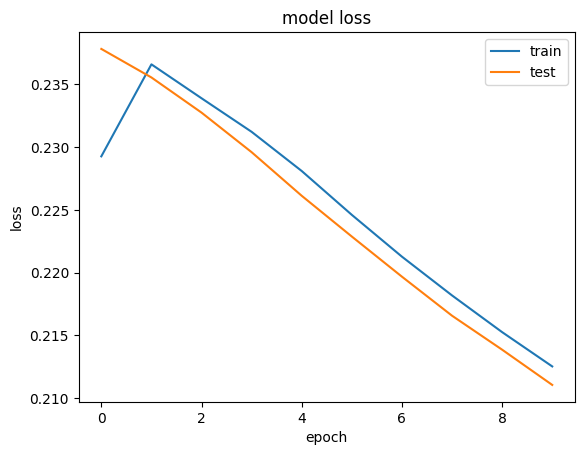

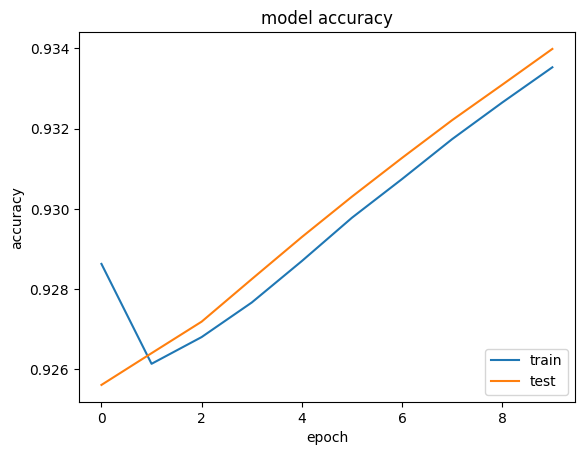

In [12]:
# We now want to plot the train and validation loss functions and accuracy curves
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference. Then, experiment as follow and compare performance with the reference scenario.

*   **Hidden layers activations**: experiment replacing sigmoids with ReLUs.
*   **Filter size**: experiment with (stacks of) square filters of size 3x3 so to obtain equivalent filters 5x5.
*   **Number of filters**: experiment increasing the number of filters in the first and second layer and find the maximum number of filters the network can tolerate before overfitting to the training samples.
* **Pooling-less architectures**: Modify the network architecture to obtain a twofold reduction of each featuremap without resorting to pooling layers (hint: take insipiration from ResNet).
* **Confusion analysis**: Using the proper metric  from sklearn, check which character is most frequently confused with which: can you explain why ?



In [13]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_images)

matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print (matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 968    0    1    0    0    1    6    1    3    0]
 [   0 1120    3    2    0    0    3    0    7    0]
 [   4    1 1002    6    2    0    0    7   10    0]
 [   0    1   12  969    0    6    0   11   10    1]
 [   0    3    3    0  934    0   11    0    1   30]
 [   2    0    0   10    0  866    6    1    5    2]
 [   7    3    0    0    2    3  940    0    3    0]
 [   2    5   24    4    3    0    0  963    2   25]
 [   8    4    2    7    5    4    4    4  930    6]
 [   5    6    2    7   20    1    1   13   11  943]]
